In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
import sys
from MyEDFImports import load_data, get_edf_filenames, import_ecg

In [2]:
edf_filenames = get_edf_filenames()
# choosing 3rd file from my edfs (CX230050.edf)
edf_fname = edf_filenames[2]
edf_data = import_ecg(edf_fname)


Extracting EDF parameters from C:\Users\tadeu\PycharmProjects\mgr_sleep_states\Jean-Pol_repaired_headers\CX230050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


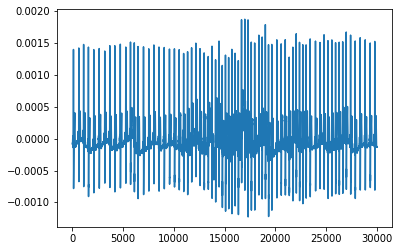

In [16]:
# shortening the data
y = edf_data[0][0].T
x = edf_data[0][1]
start = 2*int(1e5)
length = 30000 #int(2**14)-3
y = y[start:start+length]
plt.plot(y)

In [4]:
def plot_with_peaks(y, r_peaks, detector_name='nodetect', sampling_freq =500):
    # convert sample to nr to time
    r_ts = np.array(r_peaks) / sampling_freq
    # plotting
    plt.figure()
    t = np.linspace(0, len(y)/sampling_freq, len(y))
    plt.plot(t, y)
    plt.plot(r_ts, y[r_peaks], 'ro')
    plt.title(f"{detector_name}")
    plt.ylabel("ECG/mV")
    plt.xlabel("time/sec")
    plt.show()

In [5]:
sampling_freq = int(edf_data.info["sfreq"])
detectors = Detectors(sampling_freq)

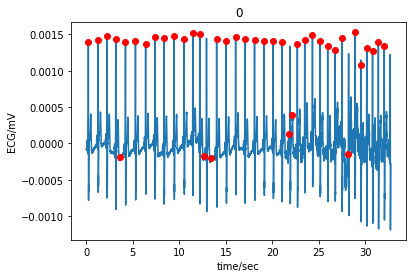

In [6]:
temp = 0
selected_detector = temp

if selected_detector < 0:
    r_peaks = detectors.two_average_detector(y)
else:
    r_peaks = detectors.get_detector_list()[selected_detector][1](y)
plot_with_peaks(y, r_peaks, temp)

r_peaks = detectors.swt_detector(y)
plot_with_peaks(y, r_peaks, temp)

In [8]:
detector_names = [d[0] for d in detectors.get_detector_list()]
detector_names

['Elgendi et al (Two average)',
 'Matched filter',
 'Kalidas & Tamil (Wavelet transform)',
 'Engzee',
 'Christov',
 'Hamilton',
 'Pan Tompkins',
 'WQRS']

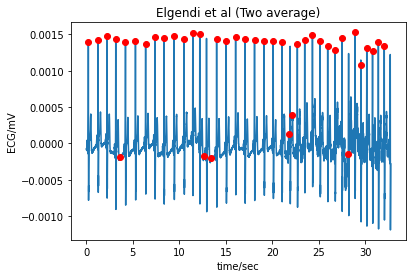

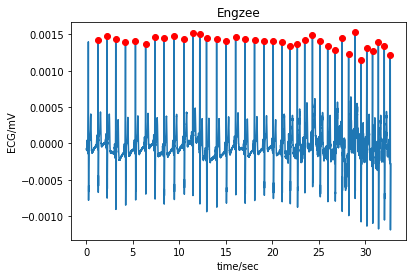

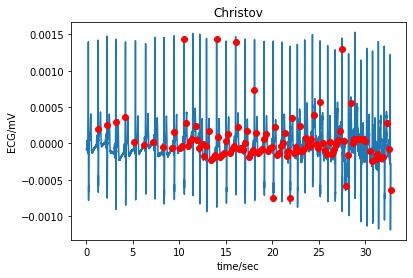

In [9]:
terrible_implementation = [d[0] for d in detectors.get_detector_list()]
for i in [0,3,4]:
    r_peaks = detectors.get_detector_list()[i][1](y.T)
    plot_with_peaks(y, r_peaks,detectors.get_detector_list()[i][0])


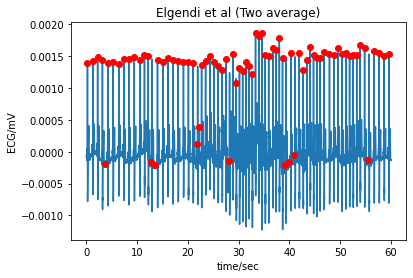

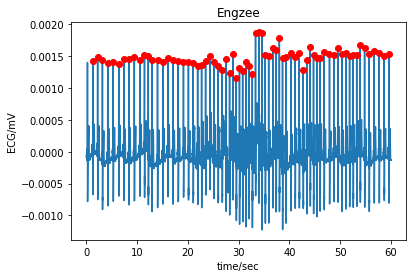

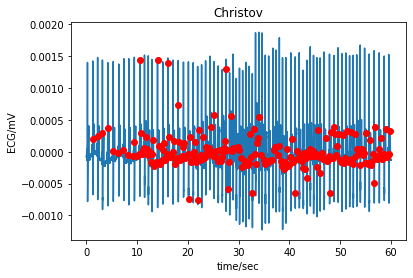

ValueError: v cannot be empty

In [38]:
for i in[0,3,4,5,6,7]:
    r_peaks = detectors.get_detector_list()[i][1](y)
    plot_with_peaks(y, r_peaks,detectors.get_detector_list()[i][0])

In [46]:
r_peaks = detectors.hamilton_detector(y.tolist())
plot_with_peaks(y, r_peaks, temp)

ValueError: v cannot be empty

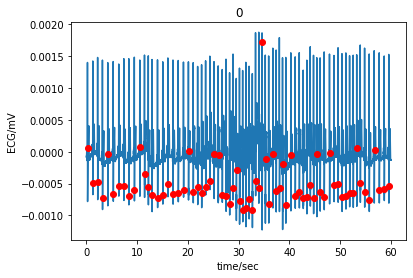

In [51]:
r_peaks = detectors.pan_tompkins_detector(y.T.tolist())
plot_with_peaks(y, r_peaks, temp)

In [45]:
r_peaks

[163,
 647,
 1122,
 1596,
 2146,
 2658,
 3204,
 3700,
 4195,
 4739,
 5304,
 5739,
 6115,
 6480,
 7025,
 7543,
 8047,
 8550,
 9065,
 9583,
 10099,
 10541,
 10978,
 11368,
 11765,
 12182,
 12618,
 13026,
 13401,
 13770,
 14126,
 14467,
 14809,
 15100,
 15413,
 15727,
 16045,
 16366,
 16684,
 17003,
 17309,
 17674,
 17979,
 18418,
 18712,
 19032,
 19374,
 19664,
 20191,
 20593,
 20997,
 21381,
 21741,
 22076,
 22399,
 22748,
 23048,
 23450,
 24002,
 24417,
 24818,
 25206,
 25589,
 25955,
 26311,
 26683,
 27006,
 27435,
 27889,
 28406,
 28877,
 29369,
 29818]

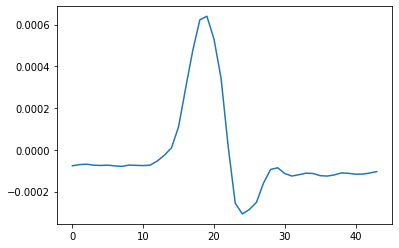

In [10]:
qrs_250Hz = [
    -7.645702713191108752e-05, -7.106347966654649338e-05,
    -6.878923855084972288e-05, -7.376223955418129054e-05,
    -7.505940739257362907e-05, -7.359340063839676460e-05,
    -7.725458974933605244e-05, -7.940956033719324199e-05,
    -7.336339268636284648e-05, -7.456628708858126470e-05,
    -7.566086758609246300e-05, -7.349735939169964598e-05,
    -5.347989517407805986e-05, -2.576322276495676022e-05,
    9.591117385409254366e-06, 1.107073389637588853e-04,
    2.961803068709630482e-04, 4.753696858843639616e-04,
    6.228405036002417419e-04, 6.402785081510430380e-04,
    5.309927524565301229e-04, 3.431126173284082992e-04,
    1.764442858986930933e-05, -2.552819441634456661e-04,
    -3.073862523701238639e-04, -2.863456790664682282e-04,
    -2.518721694690555322e-04, -1.592148022053965631e-04,
    -9.424790245873809053e-05, -8.625069025906928586e-05,
    -1.135247594299841145e-04, -1.258153399732585710e-04,
    -1.193992999231953422e-04, -1.120866635229808870e-04,
    -1.134316910065725782e-04, -1.240209251568815188e-04,
    -1.259559380186601649e-04, -1.203450016337975629e-04,
    -1.110543536387444114e-04, -1.127605818197161149e-04,
    -1.170437211404296360e-04, -1.164120454904625621e-04,
    -1.114568819107143765e-04, -1.045314027530635311e-04
]

qrs_360Hz = [
    -2.012093043565478800e-01, -1.997445779689931422e-01,
    -1.933817485967479488e-01, -1.866300438888101043e-01,
    -1.900197917130422021e-01, -1.952489409119362584e-01,
    -2.077327660900527839e-01, -2.151062251971897488e-01,
    -2.286944266031576134e-01, -2.613282425072631088e-01,
    -3.109667077596850460e-01, -3.268329535815900355e-01,
    -3.207679356378619340e-01, -2.789804314489847115e-01,
    -2.002973727171682705e-01, -7.535273835744371596e-02,
    1.617855432133499249e-01, 4.830501280448596946e-01,
    8.046776909827563218e-01, 1.110971403512063693e+00,
    1.398619676476005047e+00, 1.646910048118821468e+00,
    1.795931835917133679e+00, 1.853719993357946683e+00,
    1.766209570127352135e+00, 1.507327784812496185e+00,
    1.102571692453119923e+00, 6.726173041414026388e-01,
    2.887363696891277476e-01, -3.219198191555563970e-02,
    -2.403461836981684585e-01, -3.541368003766390826e-01,
    -3.791183904479392131e-01, -3.276287305258123728e-01,
    -2.194183275717616899e-01, -1.273112649166615873e-01,
    -1.028728718059972597e-01, -1.320473557997807190e-01,
    -1.689497023598502679e-01, -1.903472688187088646e-01,
    -2.038415630949019508e-01, -1.977016005429313439e-01,
    -1.964550042183527689e-01, -1.830856541608651133e-01,
    -1.880574388507596506e-01, -2.047347501639194822e-01,
    -2.272093875641389704e-01, -2.399271748943634652e-01,
    -2.414975147279495027e-01, -2.491120256393957733e-01,
    -2.286999849340090596e-01
]
plt.plot(qrs_250Hz)


FileNotFoundError: [Errno 2] No such file or directory: '../Images/R_peaks_detection.png'

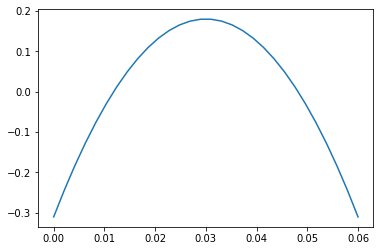

In [115]:
qrs_500hz_linsp = np.linspace(-0.7,0.7,30)
qrs_500hz  = -qrs_500hz_linsp**2 + 0.18
t = np.linspace(0, len(qrs_500hz) / 500, len(qrs_500hz))
plt.plot(t, qrs_500hz)
plt.savefig('../Images/R_peaks_detection')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_a

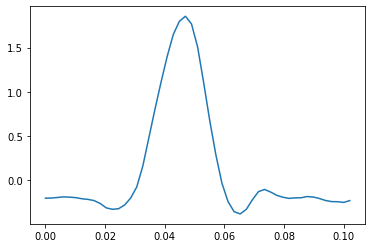

In [54]:
t = np.linspace(0, len(qrs_360Hz) / sampling_freq, len(qrs_360Hz))
plt.plot(t,qrs_360Hz)

In [94]:
yy = np.reshape(y, y.size)
print(y.shape)
yy.shape

(30000, 1)


(30000,)

C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjec

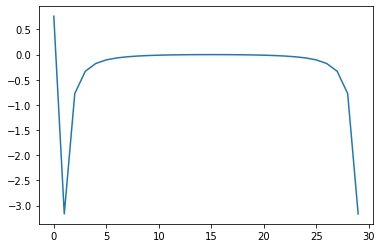

In [96]:
qrs_500hz_fft = np.fft.fft(qrs_500hz)
plt.plot(qrs_500hz_fft)
plt.show()

In [116]:
np.sum(qrs_500hz)

0.16206896551724143

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_a

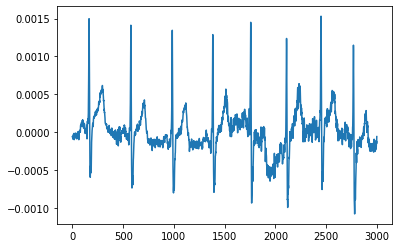

In [97]:
plt.plot(y[12000:15000])

30000


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Python\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Python\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tadeu\PycharmProjects\mgr_sleep_states\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_a

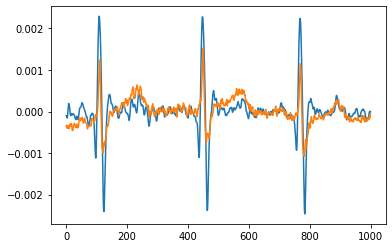

In [117]:
conv_500 = np.convolve(yy, qrs_500hz, 'same')
print(len(conv_500))
plt.plot(conv_500[14000:15000])
#plt.plot(np.sqrt(conv_500**2)[12000:15000])
plt.plot(y[14000:15000])

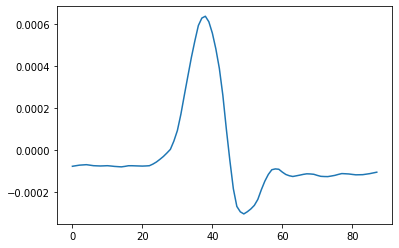

In [12]:
from scipy import interpolate
qrs_500Hz_doubled = [qrs_250Hz[i//2] for i in range(2*len(qrs_250Hz))]
lin_old = np.linspace(1,len(qrs_250Hz),len(qrs_250Hz))
lin_new = np.linspace(1,len(qrs_250Hz), 2*len(qrs_250Hz))
qrs_500Hz_interpol = np.interp(lin_new, lin_old, np.array(qrs_250Hz))
plt.plot(qrs_500Hz_interpol)

In [13]:
np.savetxt('qrs_500Hz_interpol', qrs_500Hz_interpol)

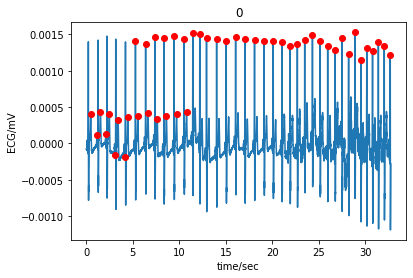

In [14]:
r_peaks = detectors.matched_filter_detector(y, 'qrs_500Hz_interpol')
plot_with_peaks(y, r_peaks, temp)

In [ ]:
from ecgdetectors import